In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
def pam(X, k):
    n = len(X)  # Số lượng điểm dữ liệu
    medoids = np.random.choice(n, k, replace=False)  # Khởi tạo ngẫu nhiên k medoids từ các điểm dữ liệu
    clusters = np.zeros(n)  # Khởi tạo mảng lưu trữ cụm cho mỗi điểm dữ liệu

    for i in range(100):  # Vòng lặp tối đa 100 lần để tối ưu các medoids
        distances = pairwise_distances(X, X[medoids])  # Tính khoảng cách giữa các điểm và medoids hiện tại
        clusters = np.argmin(distances, axis=1)  # Gán mỗi điểm dữ liệu vào cụm tương ứng với medoid gần nhất

        # Tìm các medoid mới cho mỗi cụm
        new_medoids = np.array([np.argmin(np.sum(distances[clusters == j], axis=0)) for j in range(k)])
        new_medoids = medoids[new_medoids]  # Đảm bảo chỉ số mới tương ứng với dữ liệu gốc

        if np.all(medoids == new_medoids):  # Kiểm tra nếu các medoid không thay đổi thì dừng
            break
        medoids = new_medoids  # Cập nhật medoids cho lần lặp tiếp theo
    
    return medoids, clusters

In [4]:
def clara(X, k, num_samples=5, sample_size=None):
    if sample_size is None:
        sample_size = min(40 + 2 * k, len(X))  # Xác định kích thước mẫu cho từng lần lặp

    best_medoids = None  # Lưu trữ các medoid tốt nhất tìm được
    best_cost = float('inf')  # Giá trị chi phí thấp nhất tìm được
    best_clusters = None  # Lưu trữ kết quả phân cụm tốt nhất

    for _ in range(num_samples):  # Thực hiện lặp lại cho num_samples lần
        sample_indices = np.random.choice(len(X), sample_size, replace=False)  # Chọn ngẫu nhiên một mẫu
        sample = X[sample_indices]  # Tạo tập mẫu từ các chỉ số đã chọn

        medoids, clusters = pam(sample, k)  # Chạy thuật toán PAM trên tập mẫu
        full_medoids = sample_indices[medoids]  # Ánh xạ medoids từ mẫu vào toàn bộ dữ liệu

        full_distances = pairwise_distances(X, X[full_medoids])  # Tính khoảng cách cho toàn bộ tập dữ liệu
        full_clusters = np.argmin(full_distances, axis=1)  # Gán cụm cho toàn bộ tập dữ liệu
        cost = np.sum(np.min(full_distances, axis=1))  # Tính chi phí cho cụm

        if cost < best_cost:  # Cập nhật medoids và clusters tốt nhất nếu chi phí thấp hơn
            best_medoids = full_medoids
            best_cost = cost
            best_clusters = full_clusters

    return best_medoids, best_clusters

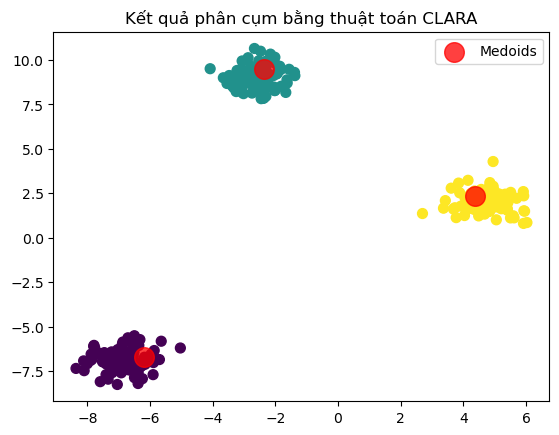

In [5]:
def test_clara_pam():
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)  # Tạo dữ liệu giả lập với 3 cụm
    k = 3  # Số lượng cụm cần tìm
    medoids, clusters = clara(X, k)  # Gọi hàm CLARA để phân cụm dữ liệu
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')  # Vẽ các điểm dữ liệu và cụm
    plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=200, alpha=0.75, label='Medoids')  # Vẽ medoids
    plt.title("Kết quả phân cụm bằng thuật toán CLARA")  # Đặt tiêu đề
    plt.legend()  # Hiển thị chú thích
    plt.show()  # Hiển thị đồ thị

test_clara_pam()